In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width',
       'Species'],
      dtype='object')

In [4]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


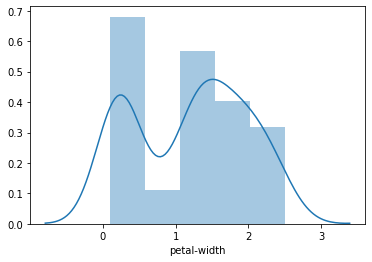

In [5]:
sns.distplot(iris['petal-width'])

In [6]:
Column_names = ['sepal-length','sepal-width','petal-length','petal-width']
Column_names

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

In [7]:
X= iris.iloc[:,0:4]
X.head()

Y= iris.iloc[:,4]
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
classifier = DecisionTreeClassifier(criterion= 'gini')

In [12]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_pred = classifier.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [16]:
acc = accuracy_score(y_pred,y_test)*100
acc

95.55555555555556

In [17]:
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [18]:
y_test

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
56     versicolor
141     virginica
44         setosa
29         setosa
120     virginica
94     versicolor
5          setosa
102     virginica
51     versicolor
78     versicolor
42         setosa
92     versicolor
66     versicolor
31         setosa
35         setosa
90     versicolor
84     versicolor
77     versicolor
40         setosa
125     virginica
99     versicolor
33         setosa
19         setosa
73     versicolor
146     virginica
91     versicolor
135     virginica
69     versicolor
128     virginica
114     virginica
48         setosa
53     versicolor
28         setosa
54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
103     virginica
58     versicolor
Name: Species, dtype: object

In [21]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


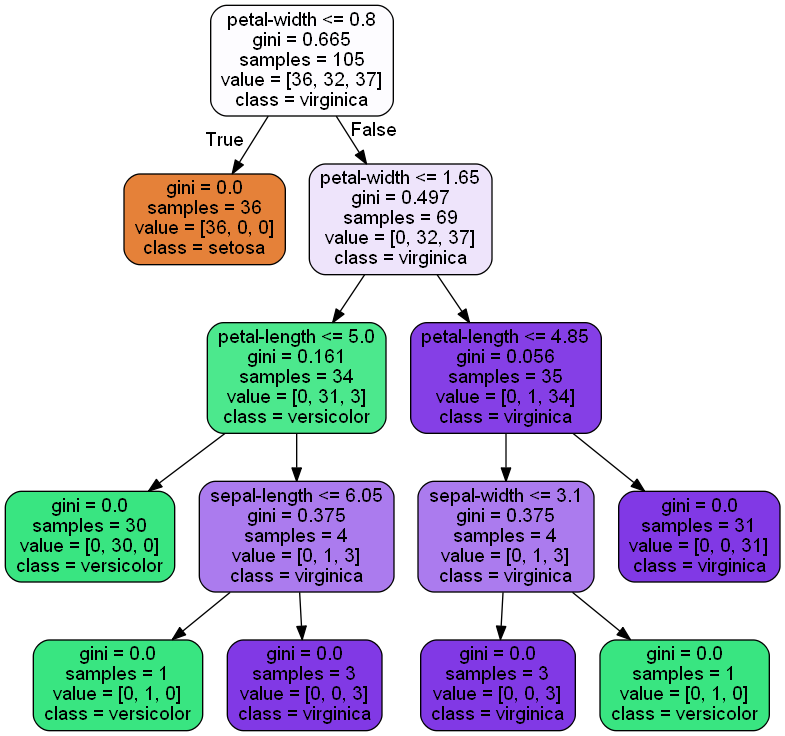

In [23]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file= dot_data, filled= True , rounded = True, 
                special_characters=False, feature_names=Column_names, class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())